In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
#os.chdir('/home/esther/Desktop/BehavioralTraining/code')

In [3]:
os.getcwd()

'/home/esther/Desktop/BehavioralTraining/code'

In [4]:
from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices

from scoringFunctions import scoreChoices
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import scorePerPhase

from analysisFunctions import testRTbasedOnPhaseScoring

from rtDistFunctions import computeDensityPerPhase

from plottingFunctions import plotIt

In [5]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

In [6]:
#%% LOAD IN DATA
Adat,Mdat = loadData()

In [8]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

#%% join dataframes to feed into simulation loop
sideChoices = makeSideChoices(sides,choices)

** First let's see what completely unfiltered data does which is divided into correct and incorrect based purely on the raw sensor scores. Cancelled trials have been removed however, to exclude trials where the experimenter answered (in order to test the program) or the rat never left the startbox.This data does still include the trails (many at the beginning where the sensors (maze arms) were still right next to the start-box) where the sensors were accidentally activated (usually by the tail of the rat) this was particularly a problem in the first four phases (there are a lot of zero reaction times which indicate hints or cancelled trials (perhaps not noted manually?) ** 

In [16]:
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(choices, sides)

In [17]:
rt_raw = Adat.xs('reaction_time',level = 1, axis = 1)
# remove cancelled and timed out trials
rt = rt_raw[~np.isnan(choices)]


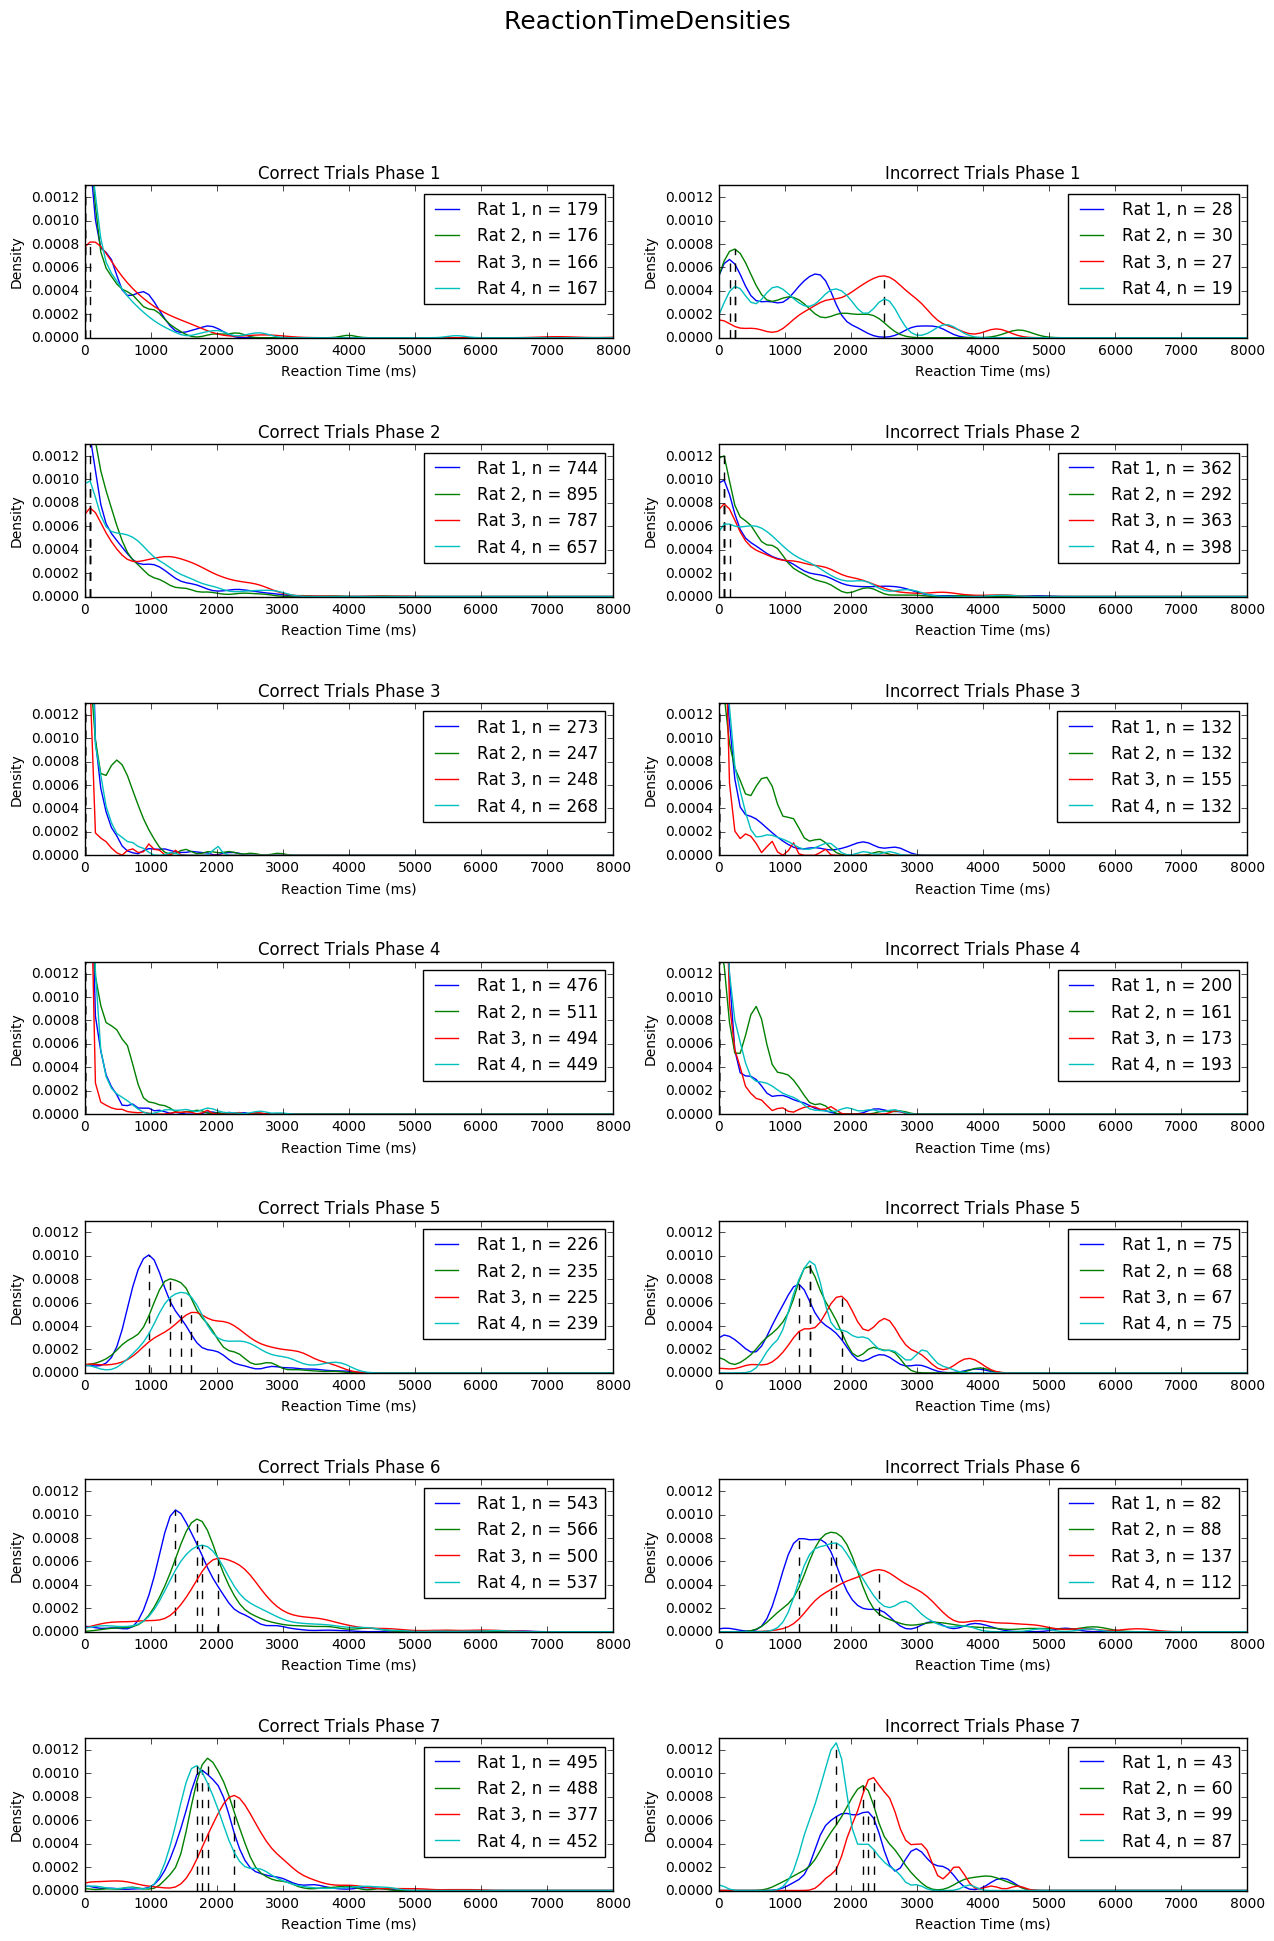

In [18]:
computeDensityPerPhase(rt, correct, incorrect)

** Now lets's see what happends when we exclude trials where hints were given. A trial with a hint is defined here as a trial where 1 reward was given but the rat answered incorrectly (judged by sensor data). In hindsight this is actually a very flawed detection because it now only leaves out incorrect trials with hints, but there's no way with this method to find out which correct trials contained hints. HOWEVER, experimenters/trainers always noted when they gave a hint, and those trials were marked as nan and therefore excluded (by function removeCancelledTrials), since these trials are already excluded it doesn't seem necessary to filter out hints again, but I'll do it just to see what the result is:**

In [26]:
#%% Determine incorrect and correct trials
validTrials, correct, incorrect, nTotalTrials = scoreChoices(Adat, choices, sides)

rt_raw = Adat.xs('reaction_time',level = 1, axis = 1)
rtnohints = rt[validTrials]
rtThres = rtnohints[rtnohints > 100 ]

# extract reaction times from Adat, and remove trials with reaction times faster than 100ms (false activation of sensors, for instance by tail)
#rt1 = preProcessReactionTimes(Adat, Mdat, 100)

# just to be sure set nans in choices (cancelled and timed out trials) to nans in rt as well
rt = rtThres[~np.isnan(choices)]

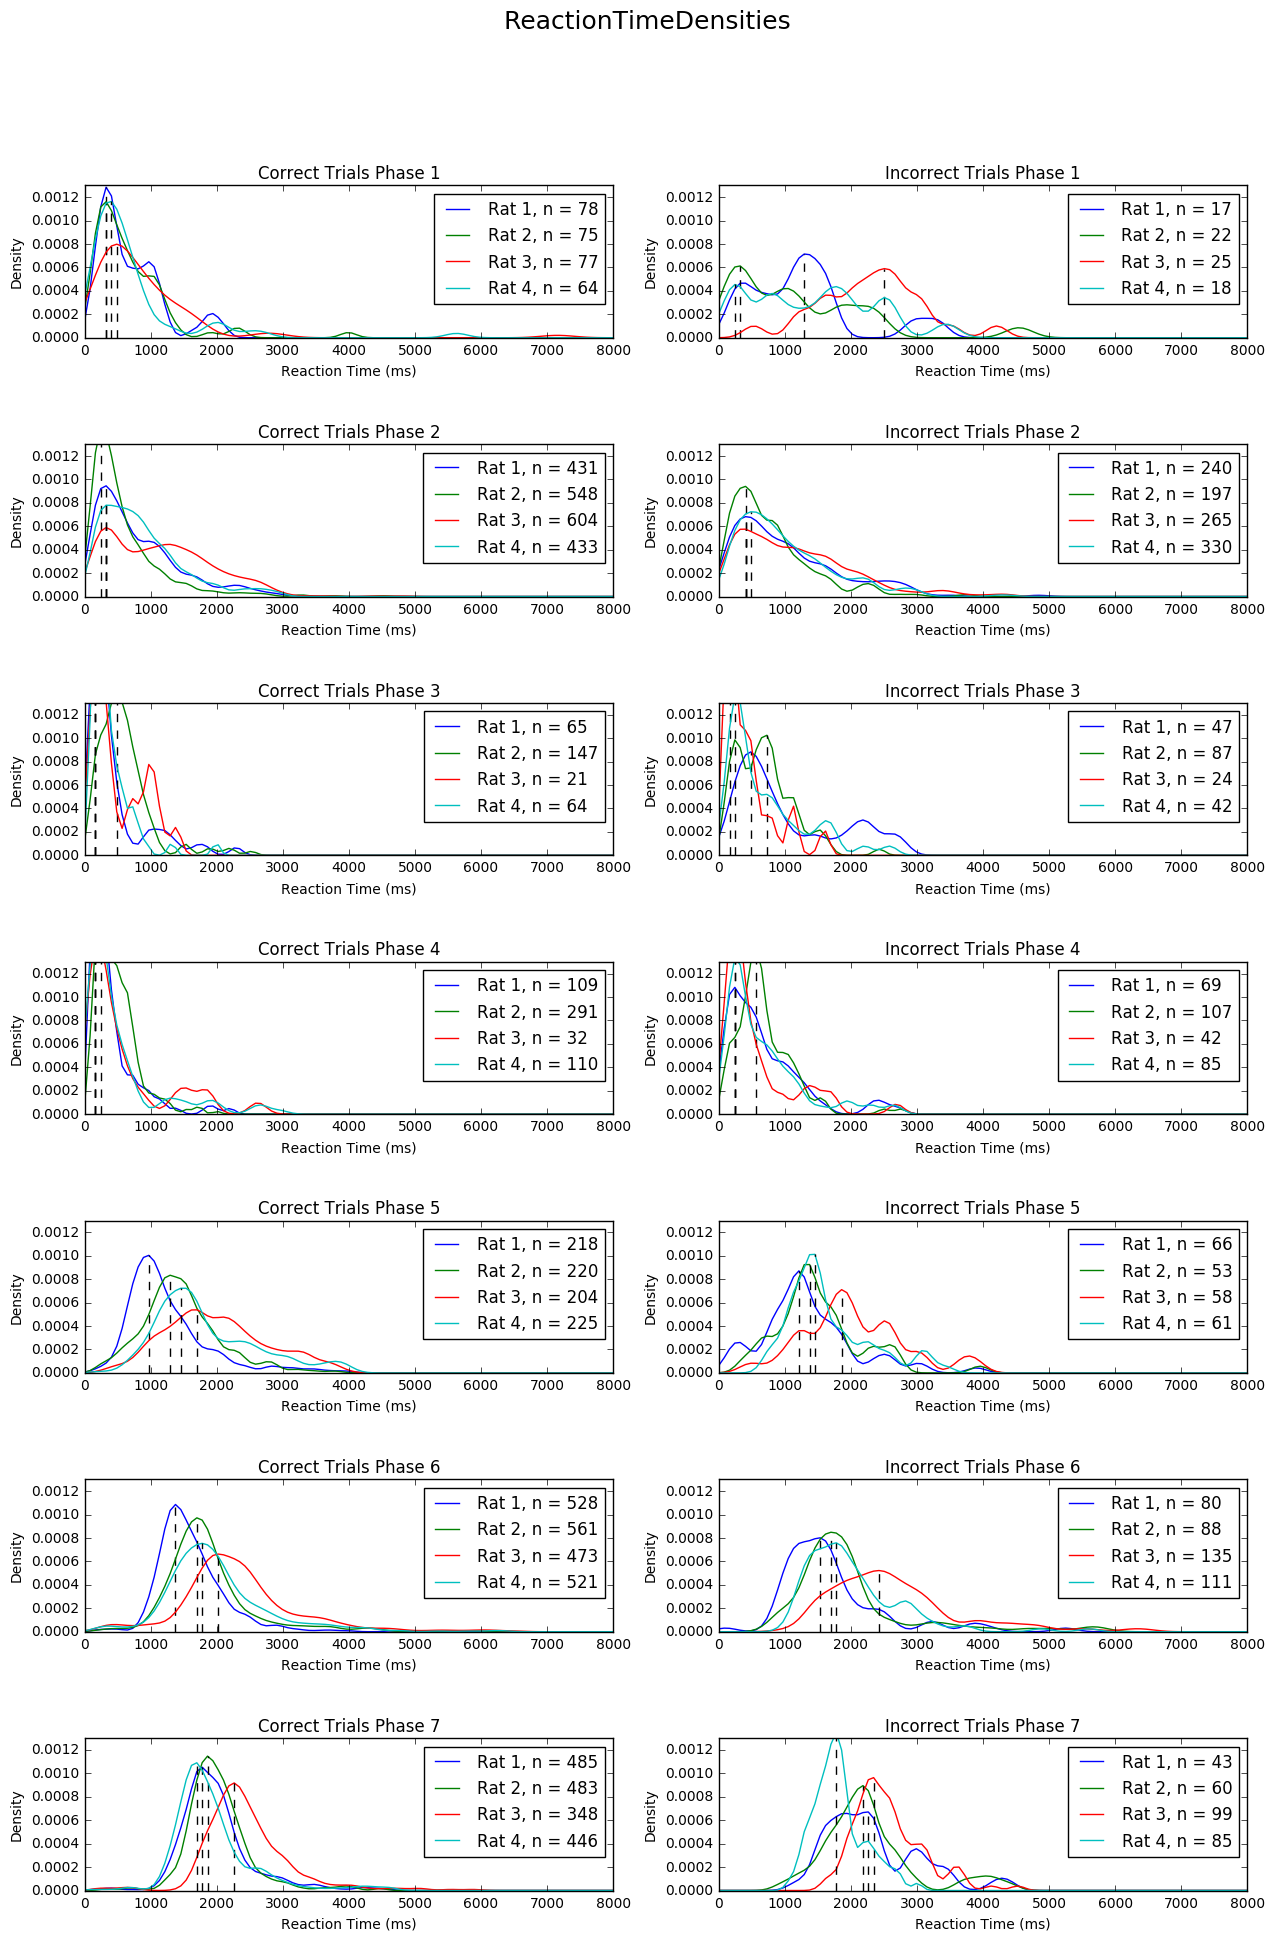

In [27]:
#%% Compute density for correct and incorrect trials
computeDensityPerPhase(rt, correct, incorrect)

** A better method would be to try using scoring per phase (based on number of rewards given, the threshold for a correct trial(# rewards given) varies per phase). This required making a new function, a variation on scorePerPhase (used to calculate the scores per day in this manner), but then rewritten not to immediately calculate a sum per day, but to mark each trial as correct or incorrect (for use as a mask).**

In [9]:
rtFiltered, correct, incorrect, valid = testRTbasedOnPhaseScoring(Adat,Mdat)

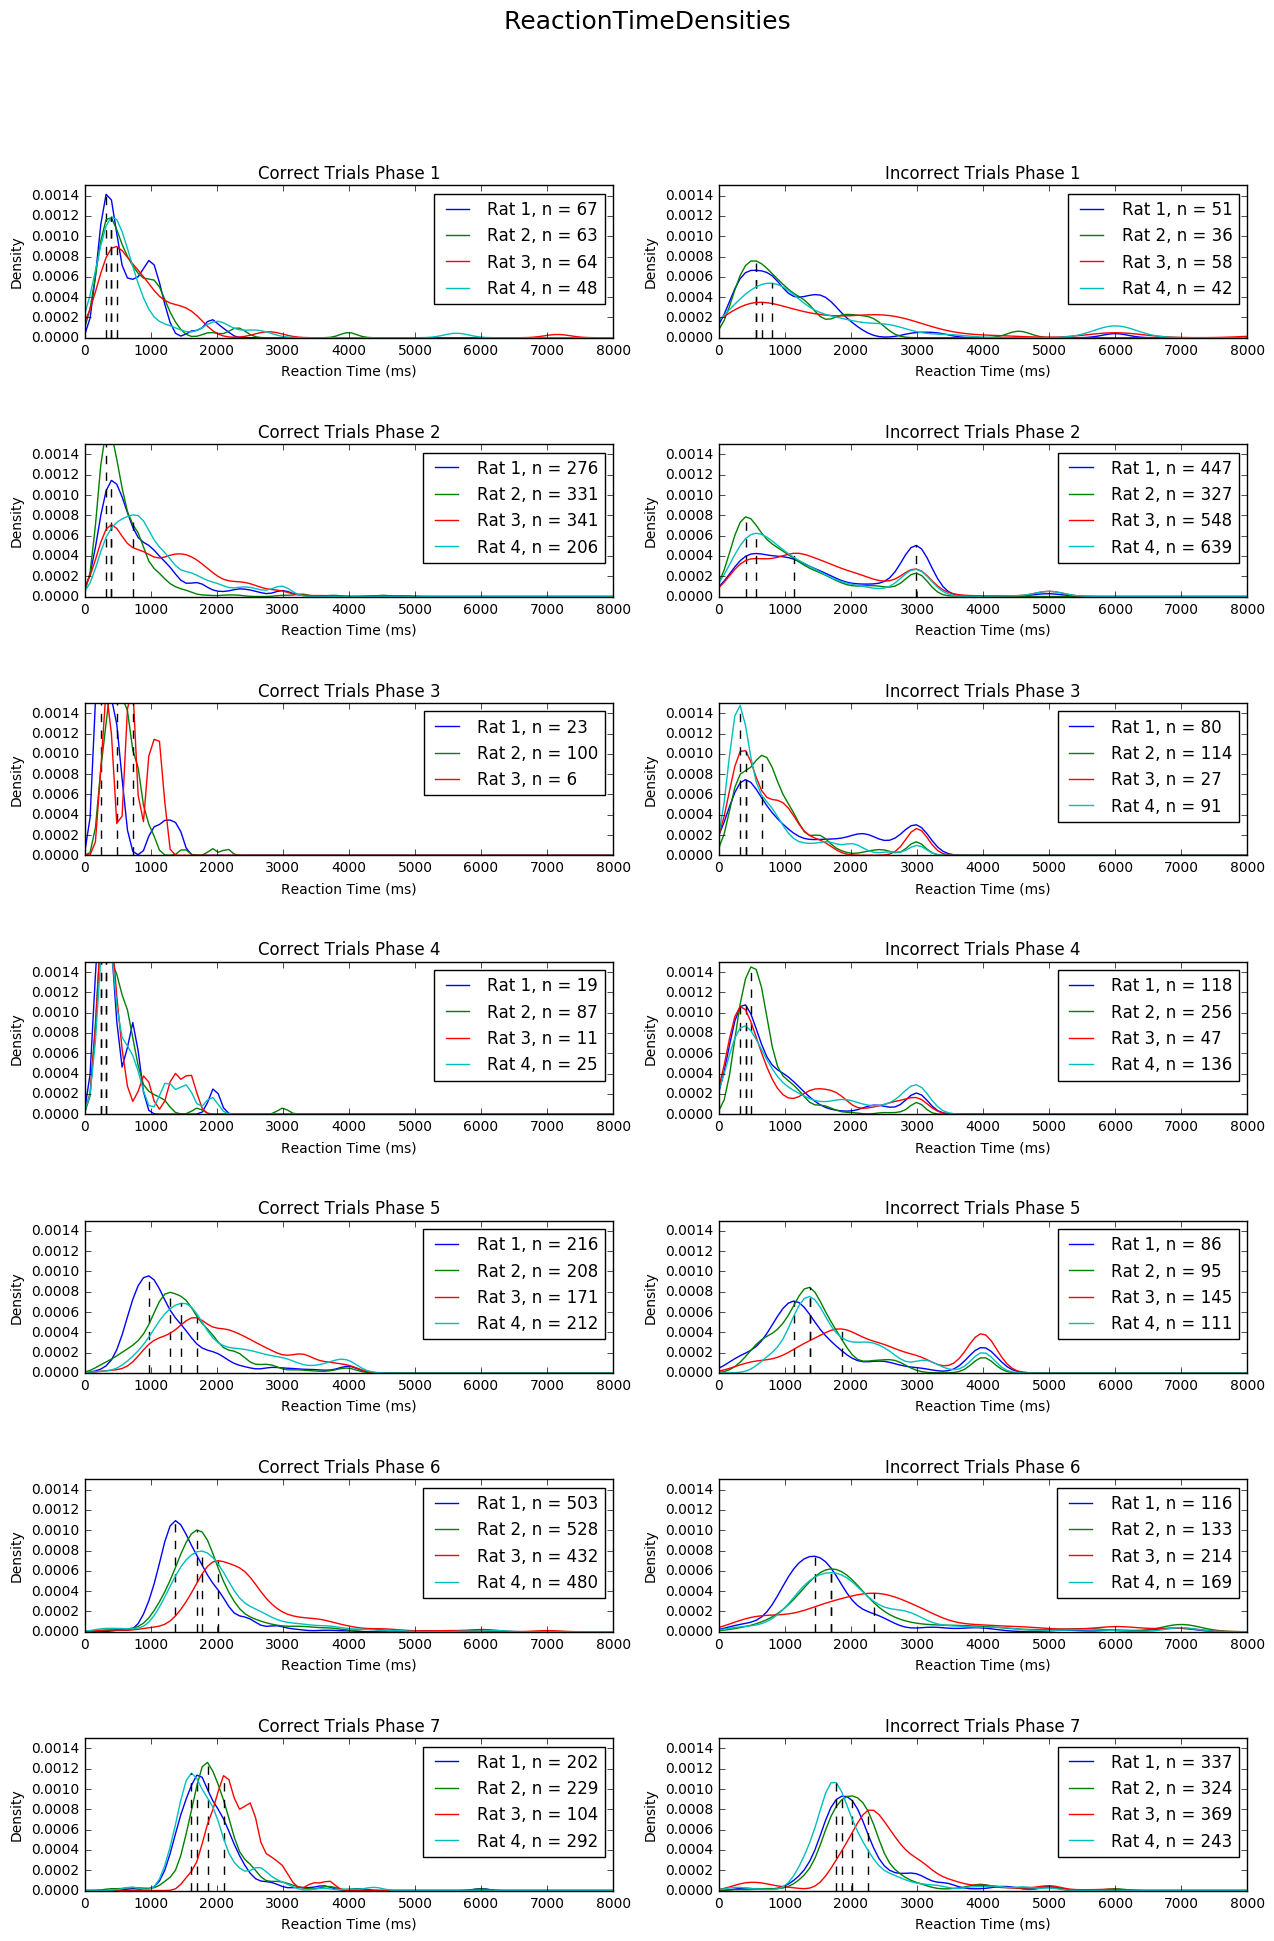

In [10]:
computeDensityPerPhase(rtFiltered, correct, incorrect)

The reaction time distribution of correct trials is predominantly unimodal while the distribution of incorrect trials appears bimodal. A reason for this could be that the second peak in the incorrect trials are trials where the rats hesitate and guess. There is a slight hint of a second peak in the incorrect trials as well, but far less prominent. The first peak most likely represents those trials where the animals were sure of their choice, whether it was correct or not. When applying a strategy the animals are also sure of their choices and react quickly (no second peak present).
*to do: analyse modes of both peaks seperately and compare (first peaks of correct and incorrect dist.) and second peaks of both.* 

The distributions also appear wider in the distributions of the incorrect trials (will need to verify this with a interquartile interval measure)

### Sensor Scored

But it would be more accurate to only take the last three phases (5,6,7), since sensor readings (recording reaction times) were not reliable in the first four phases. In those last three phases however sensor scoring was also very reliable (as can be seen from the degree to which it represents the manually scored data in those last phases in the scoring comparison figures). So it is probably best to only look at the reaction times of those phases, yet the reaction times should be filtered to some degree so that only valid trials are counted. 

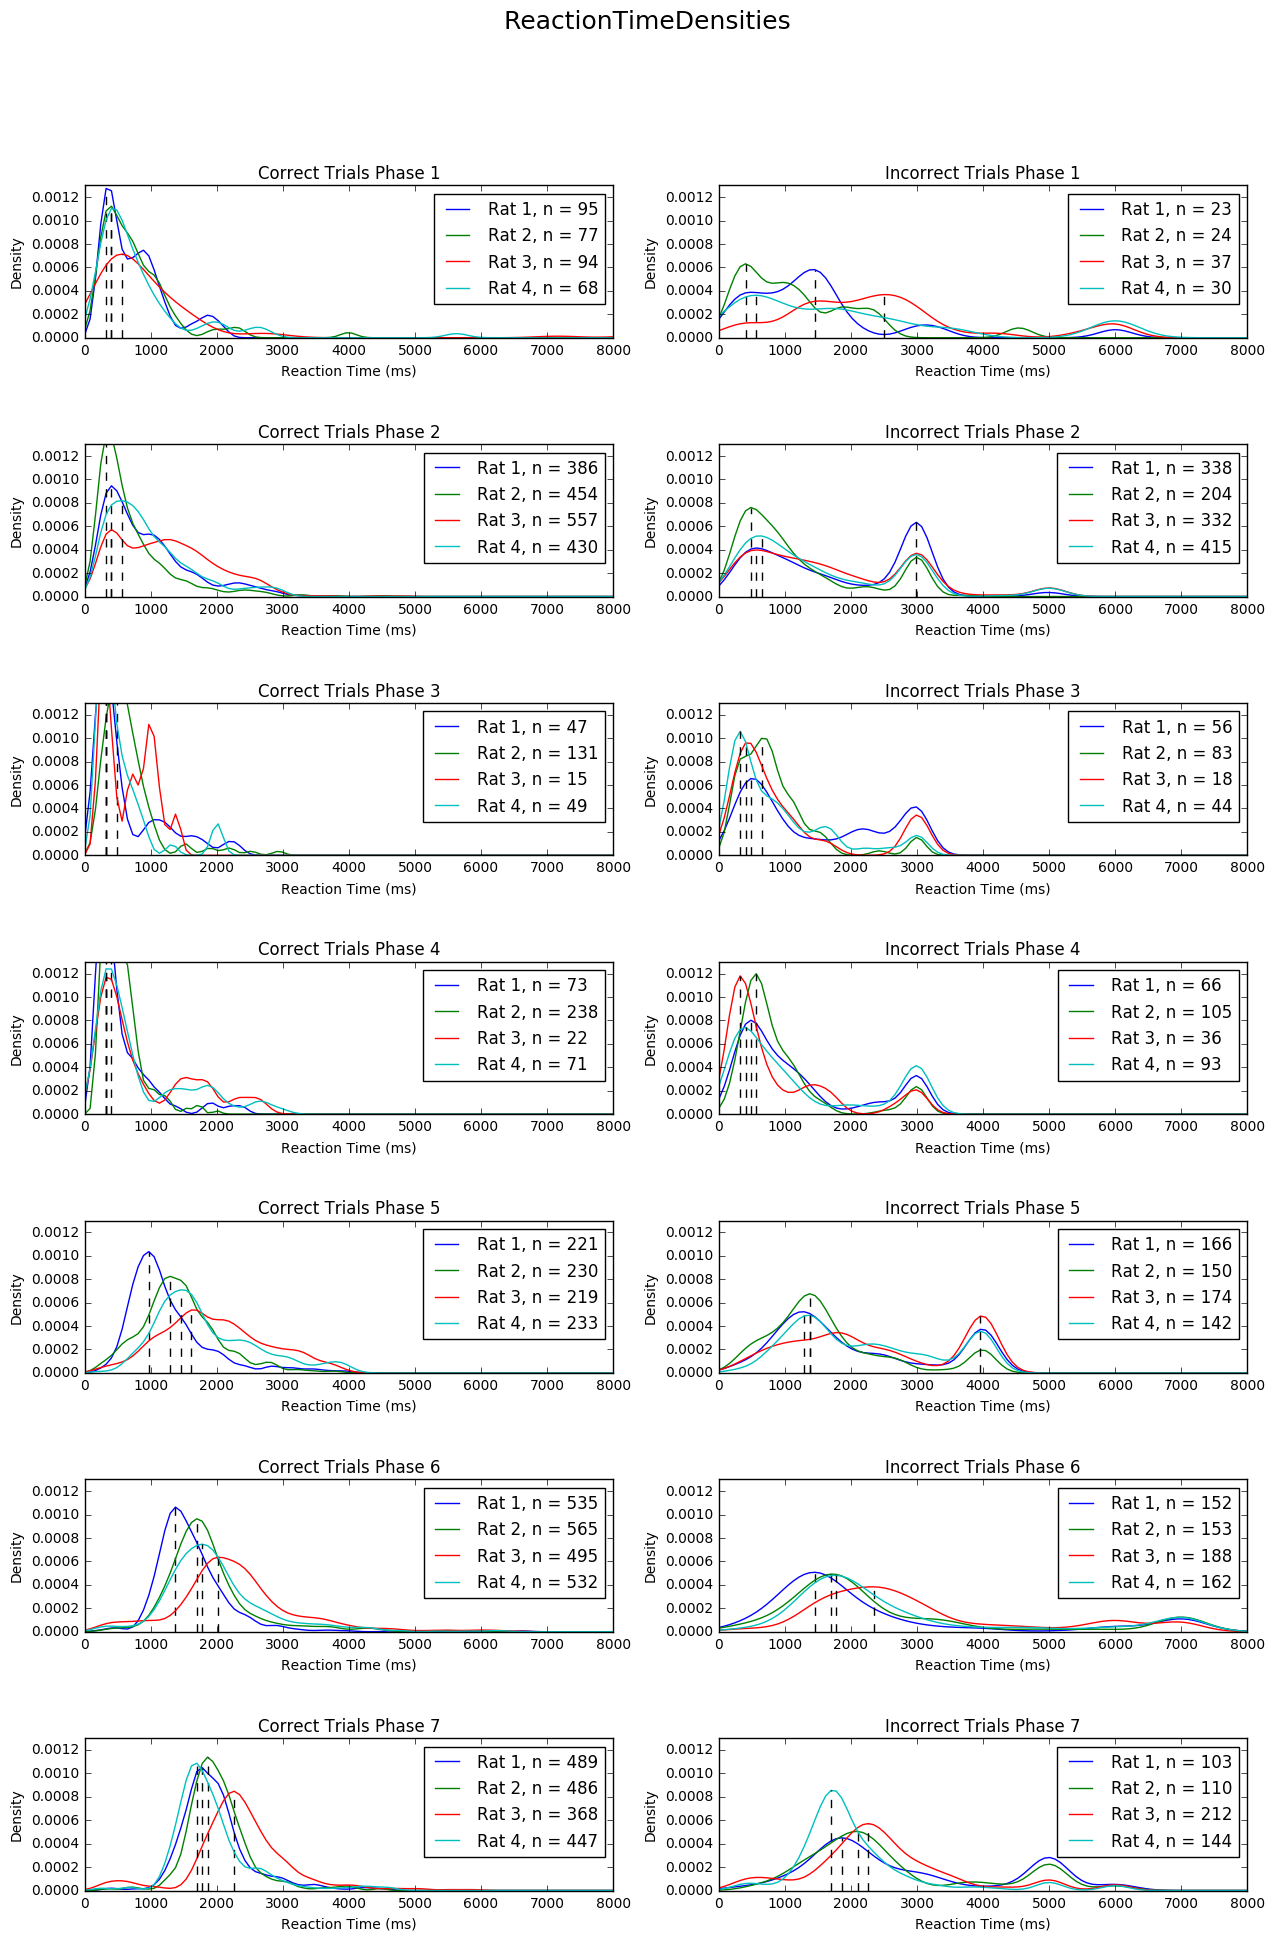

In [34]:
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(choices, sides)
computeDensityPerPhase(rtFiltered, correct, incorrect)

Figure out what's so special about rtFiltered that it leaves 103 trials in the last phase for incorrect, when I attempt to rebuild how this selection came to be piece by piece I end up with 50 incorrect trials left in phase 7 when removing all the manually cancelled trials etc. ,must test

In [35]:
rt = Adat.xs('reaction_time',level = 1, axis = 1)

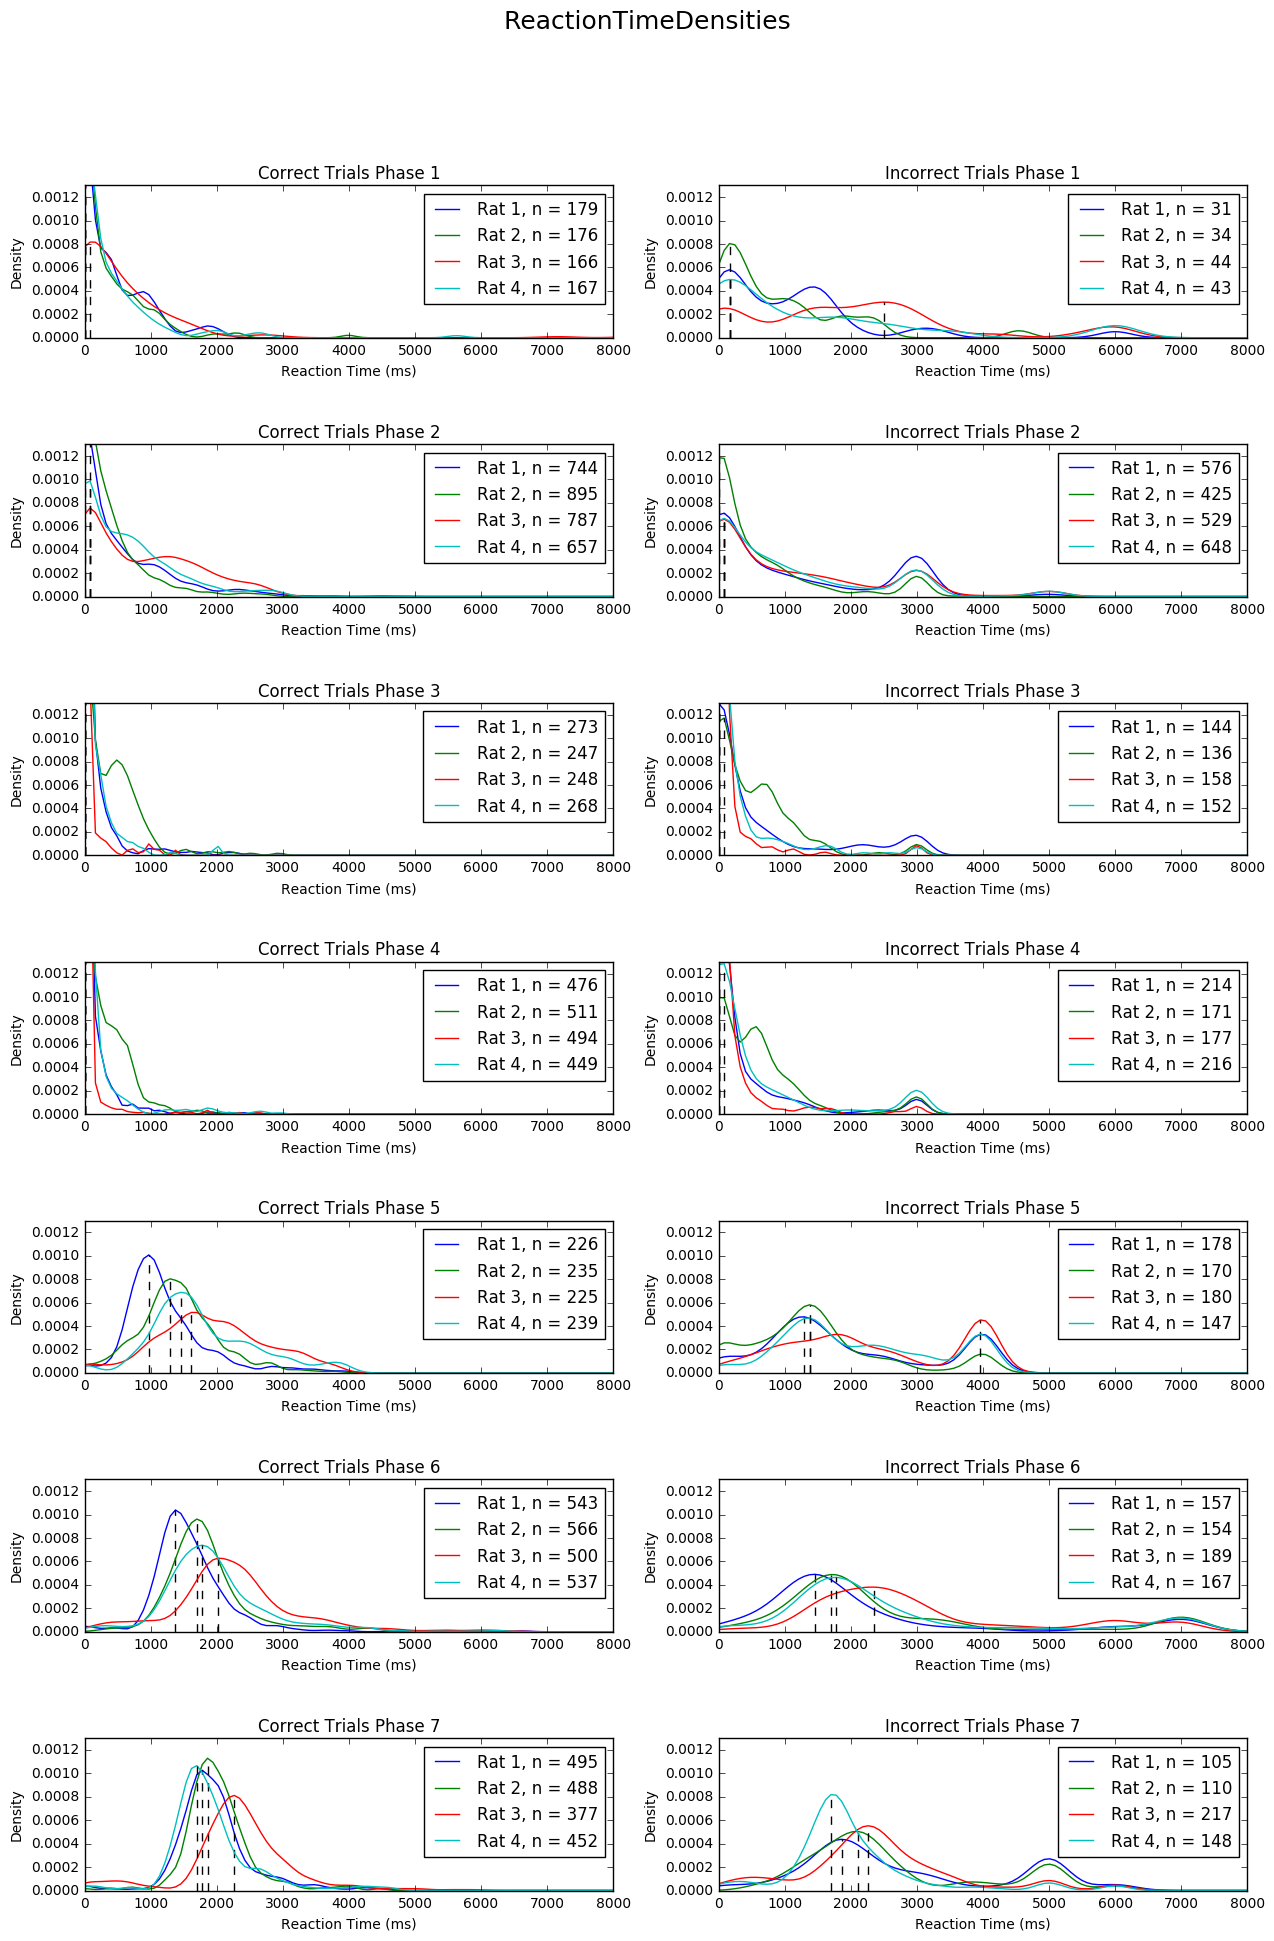

In [36]:
# with just the raw reaction times
computeDensityPerPhase(rt, correct, incorrect)

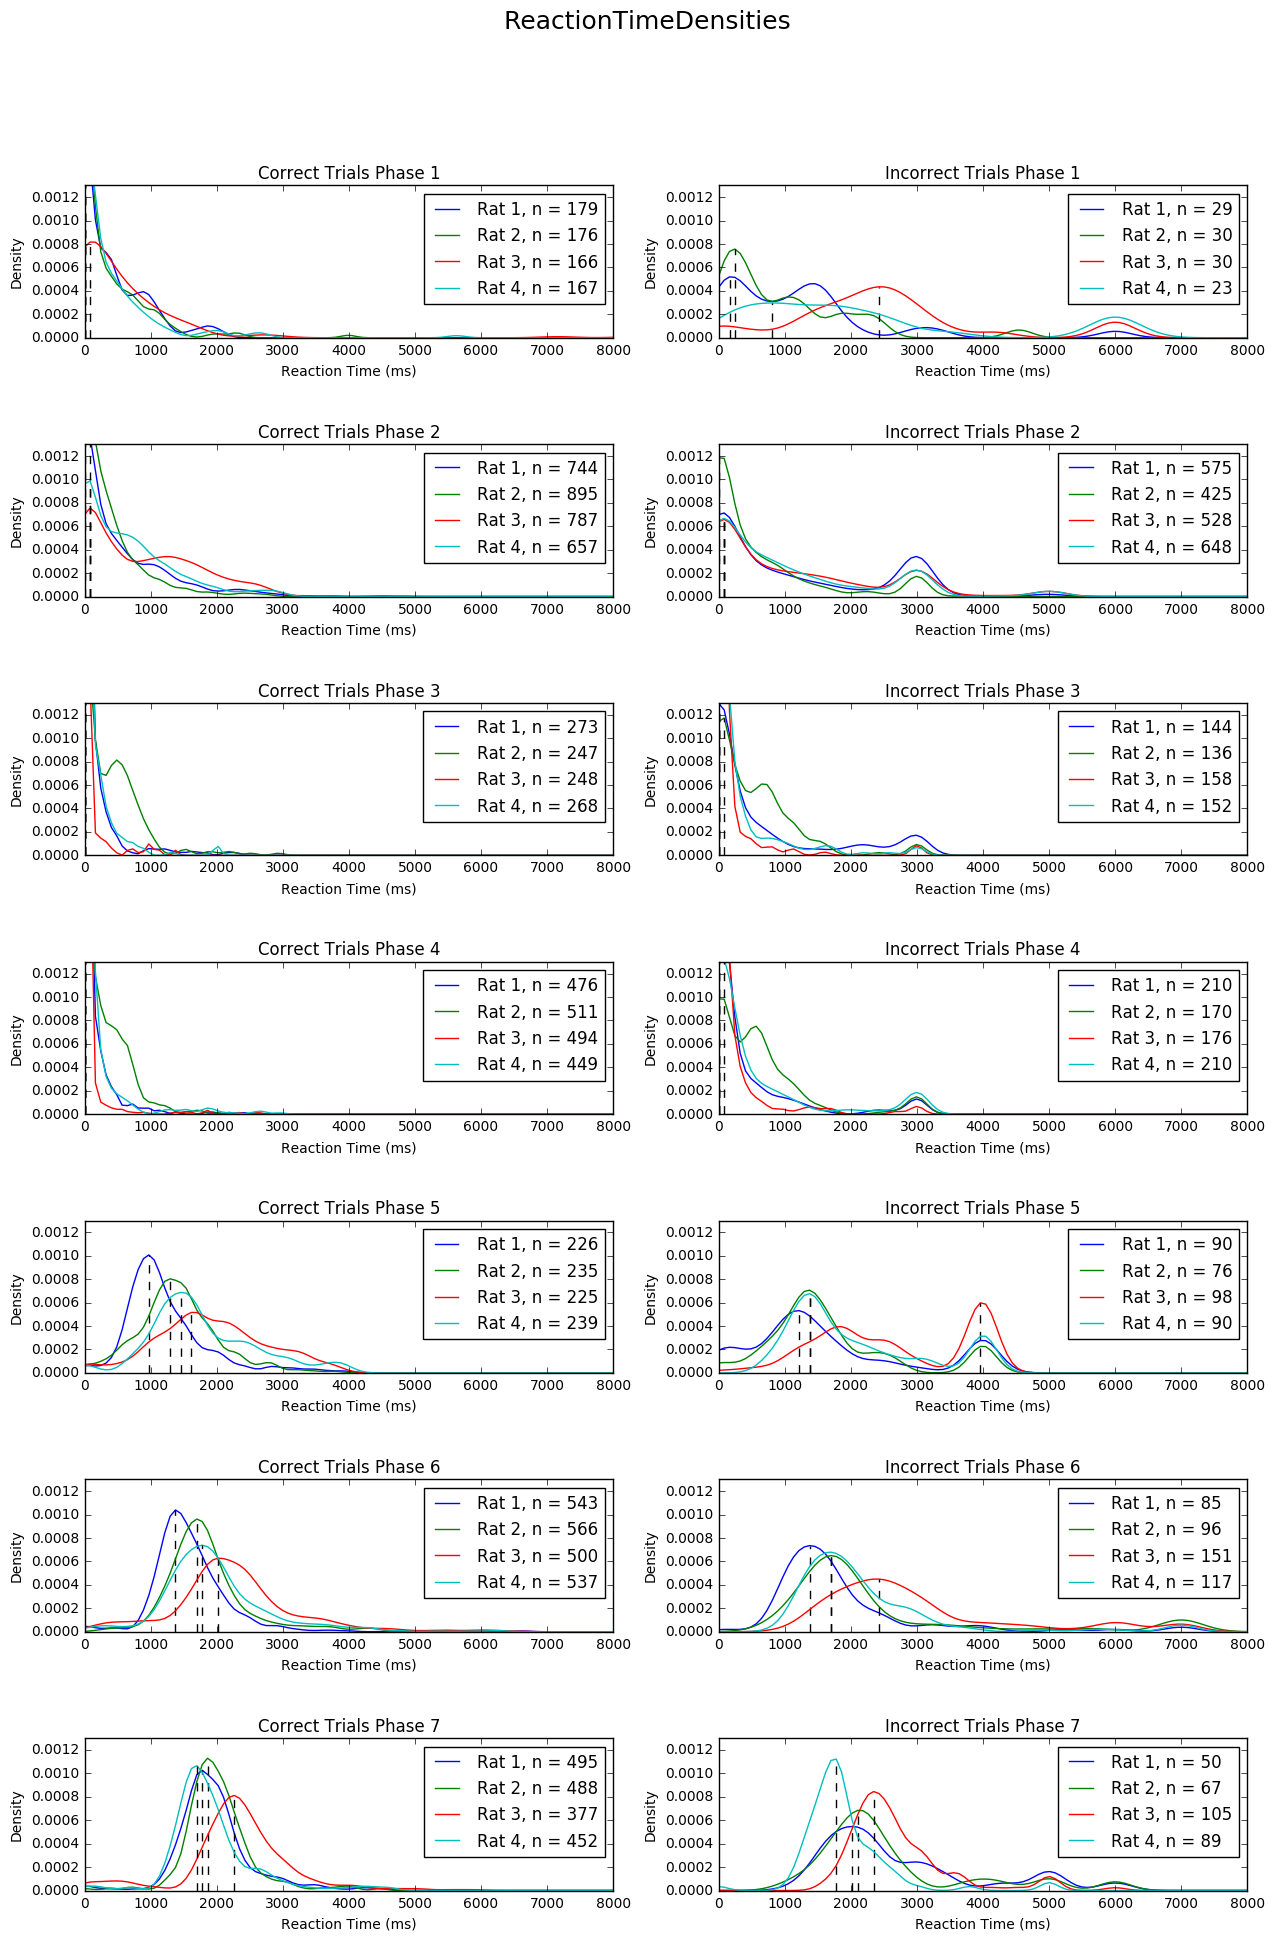

In [37]:
# with the manually cancelled trials removed
rtFilterTest = rt[~np.isnan(Mdat)]
computeDensityPerPhase(rtFilterTest, correct, incorrect)

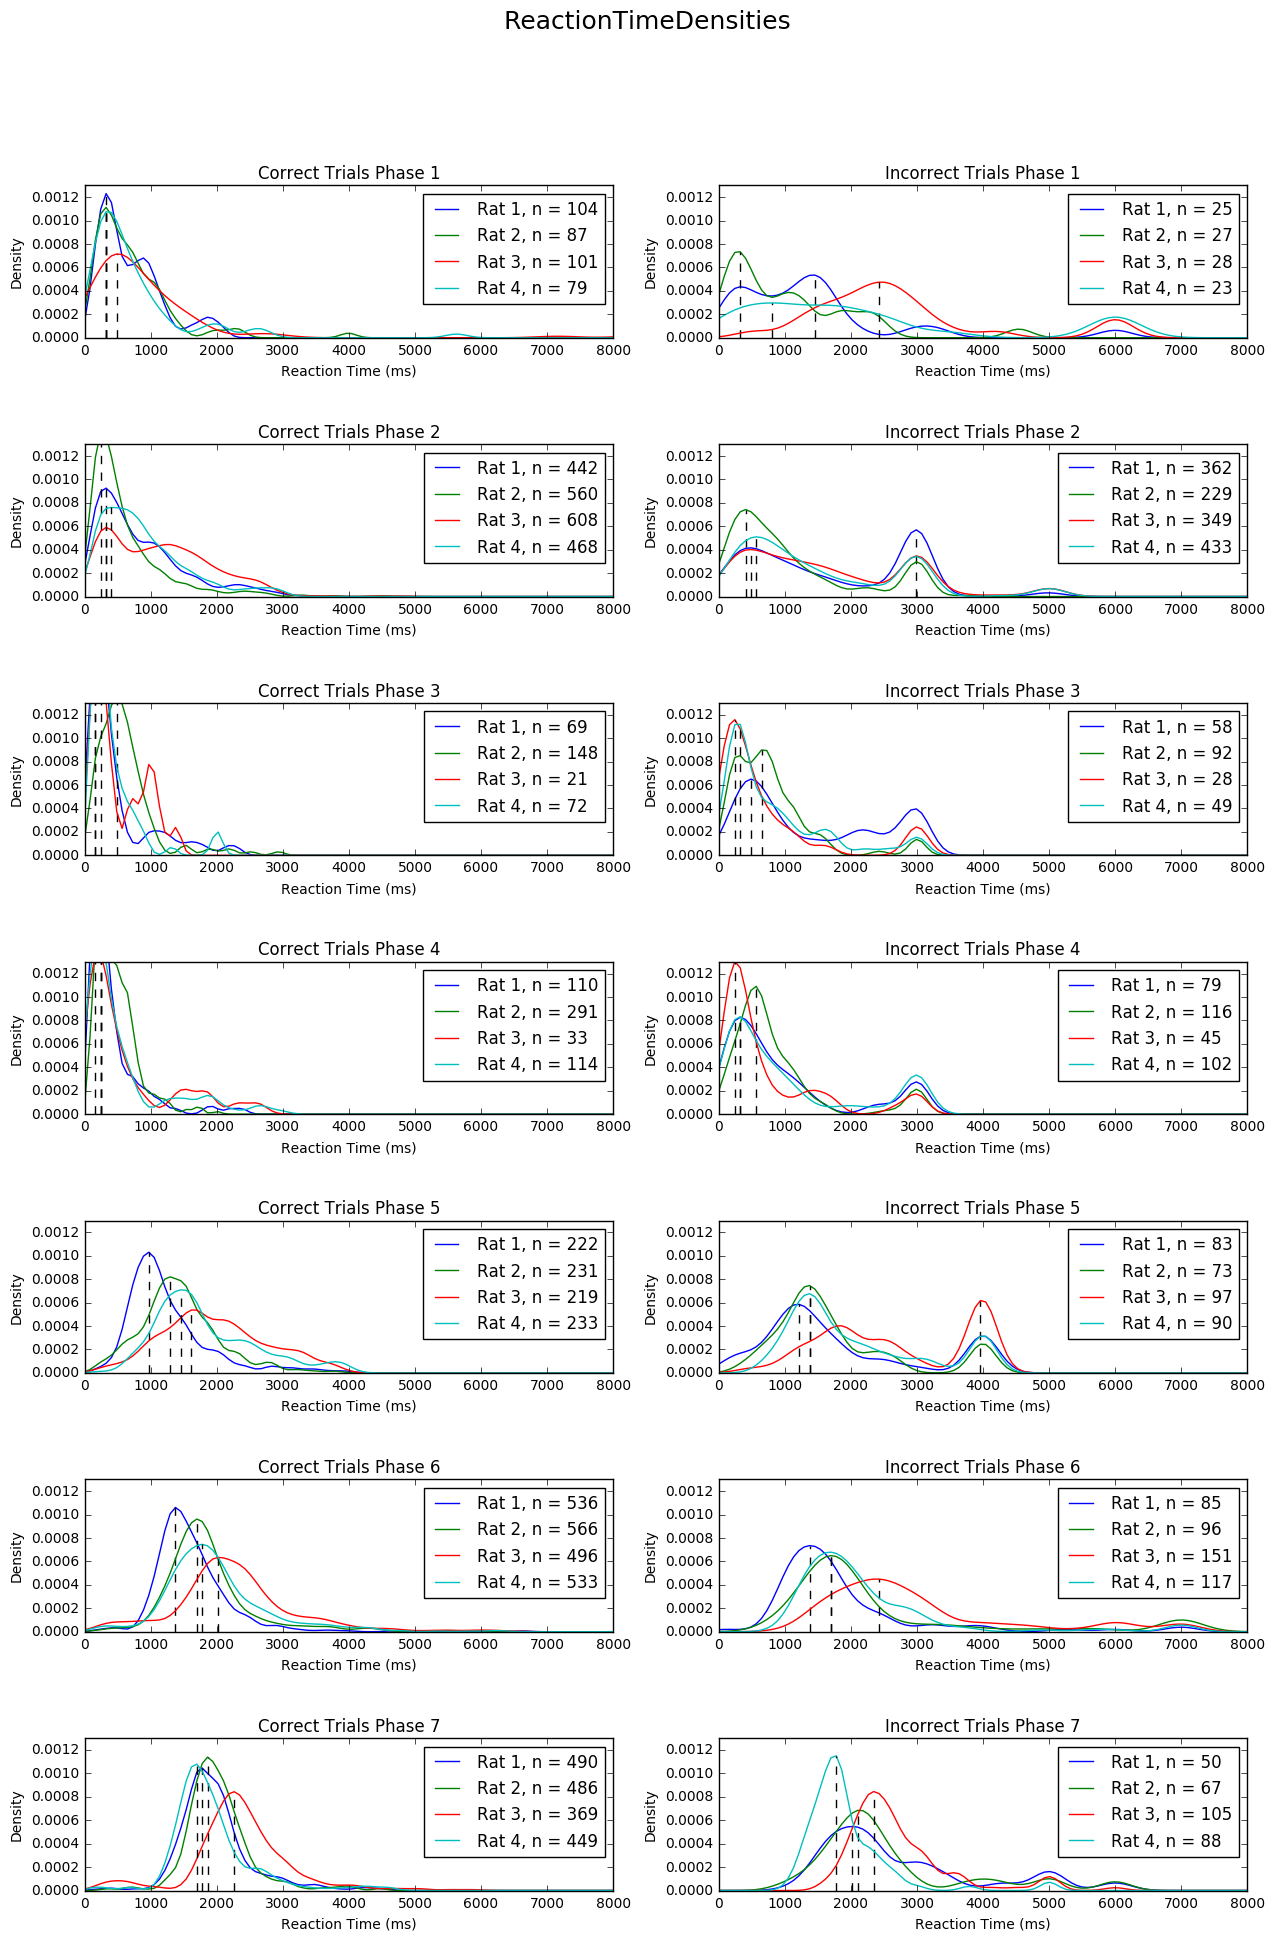

In [39]:
# now when removing the computer cancelled trials
#(or trials where experimenter answered before rat could cross sensors) both are noted as reaction time 0
rtFilterTest2 = rtFilterTest[rtFilterTest > 100]
computeDensityPerPhase(rtFilterTest2, correct, incorrect)

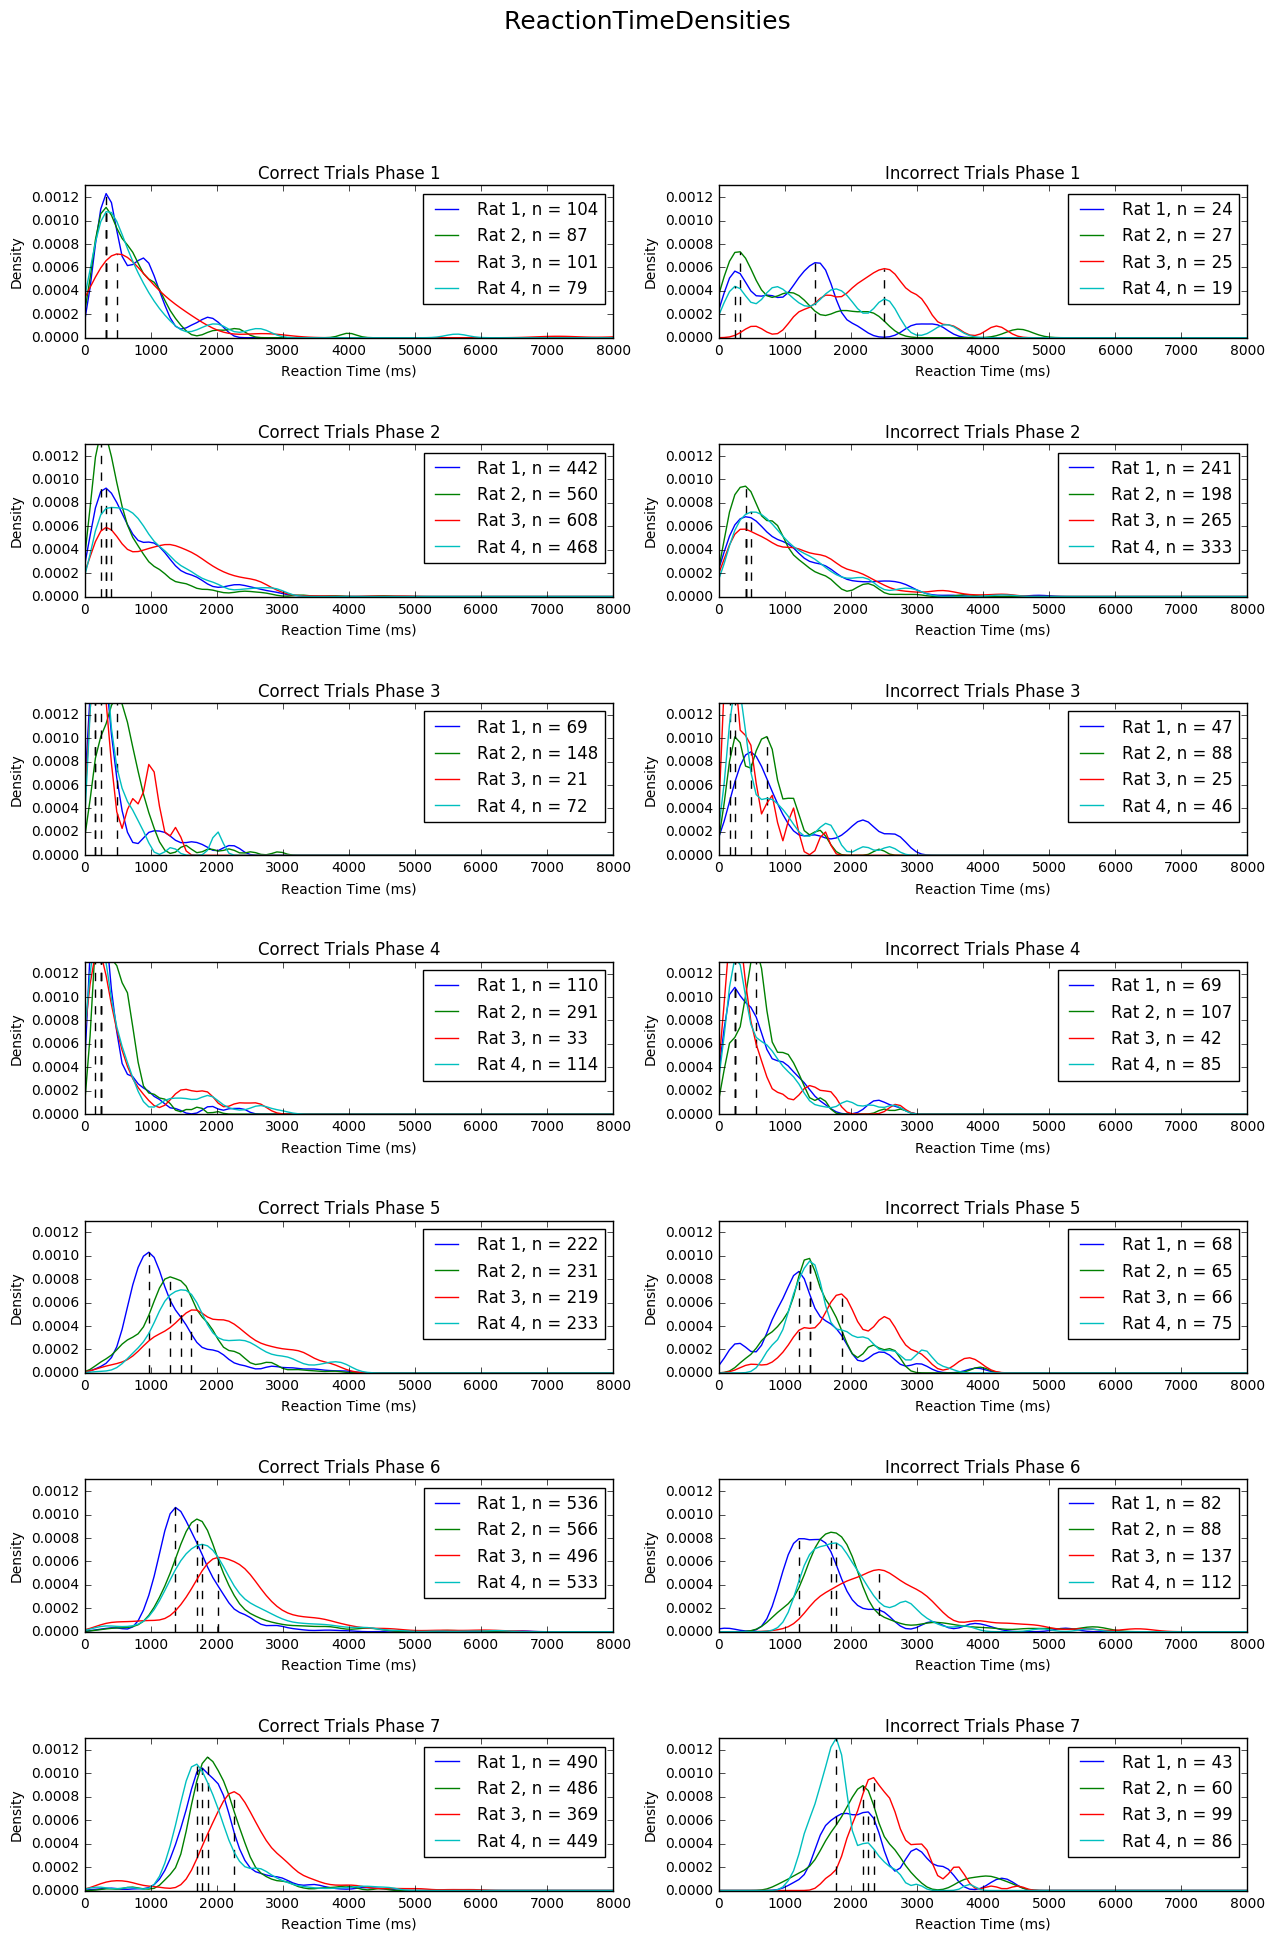

In [40]:
# now also removing all the timed out trials (noted as a 2 in choices)
rtFilterTest3 = rtFilterTest2[~np.isnan(choices)]
computeDensityPerPhase(rtFilterTest3, correct, incorrect)

In [47]:
# since the manually cancelled trials have already been turned to nan in choices
#it shouldn't be necessary to find nans in mdat
rt_raw = Adat.xs('reaction_time',level = 1, axis = 1)
rtChoicesFilter = rt_raw[~np.isnan(choices)]
rt = rtChoicesFilter[rtChoicesFilter > 100]

# correct and incorrect come from sensor scores only
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(choices, sides)

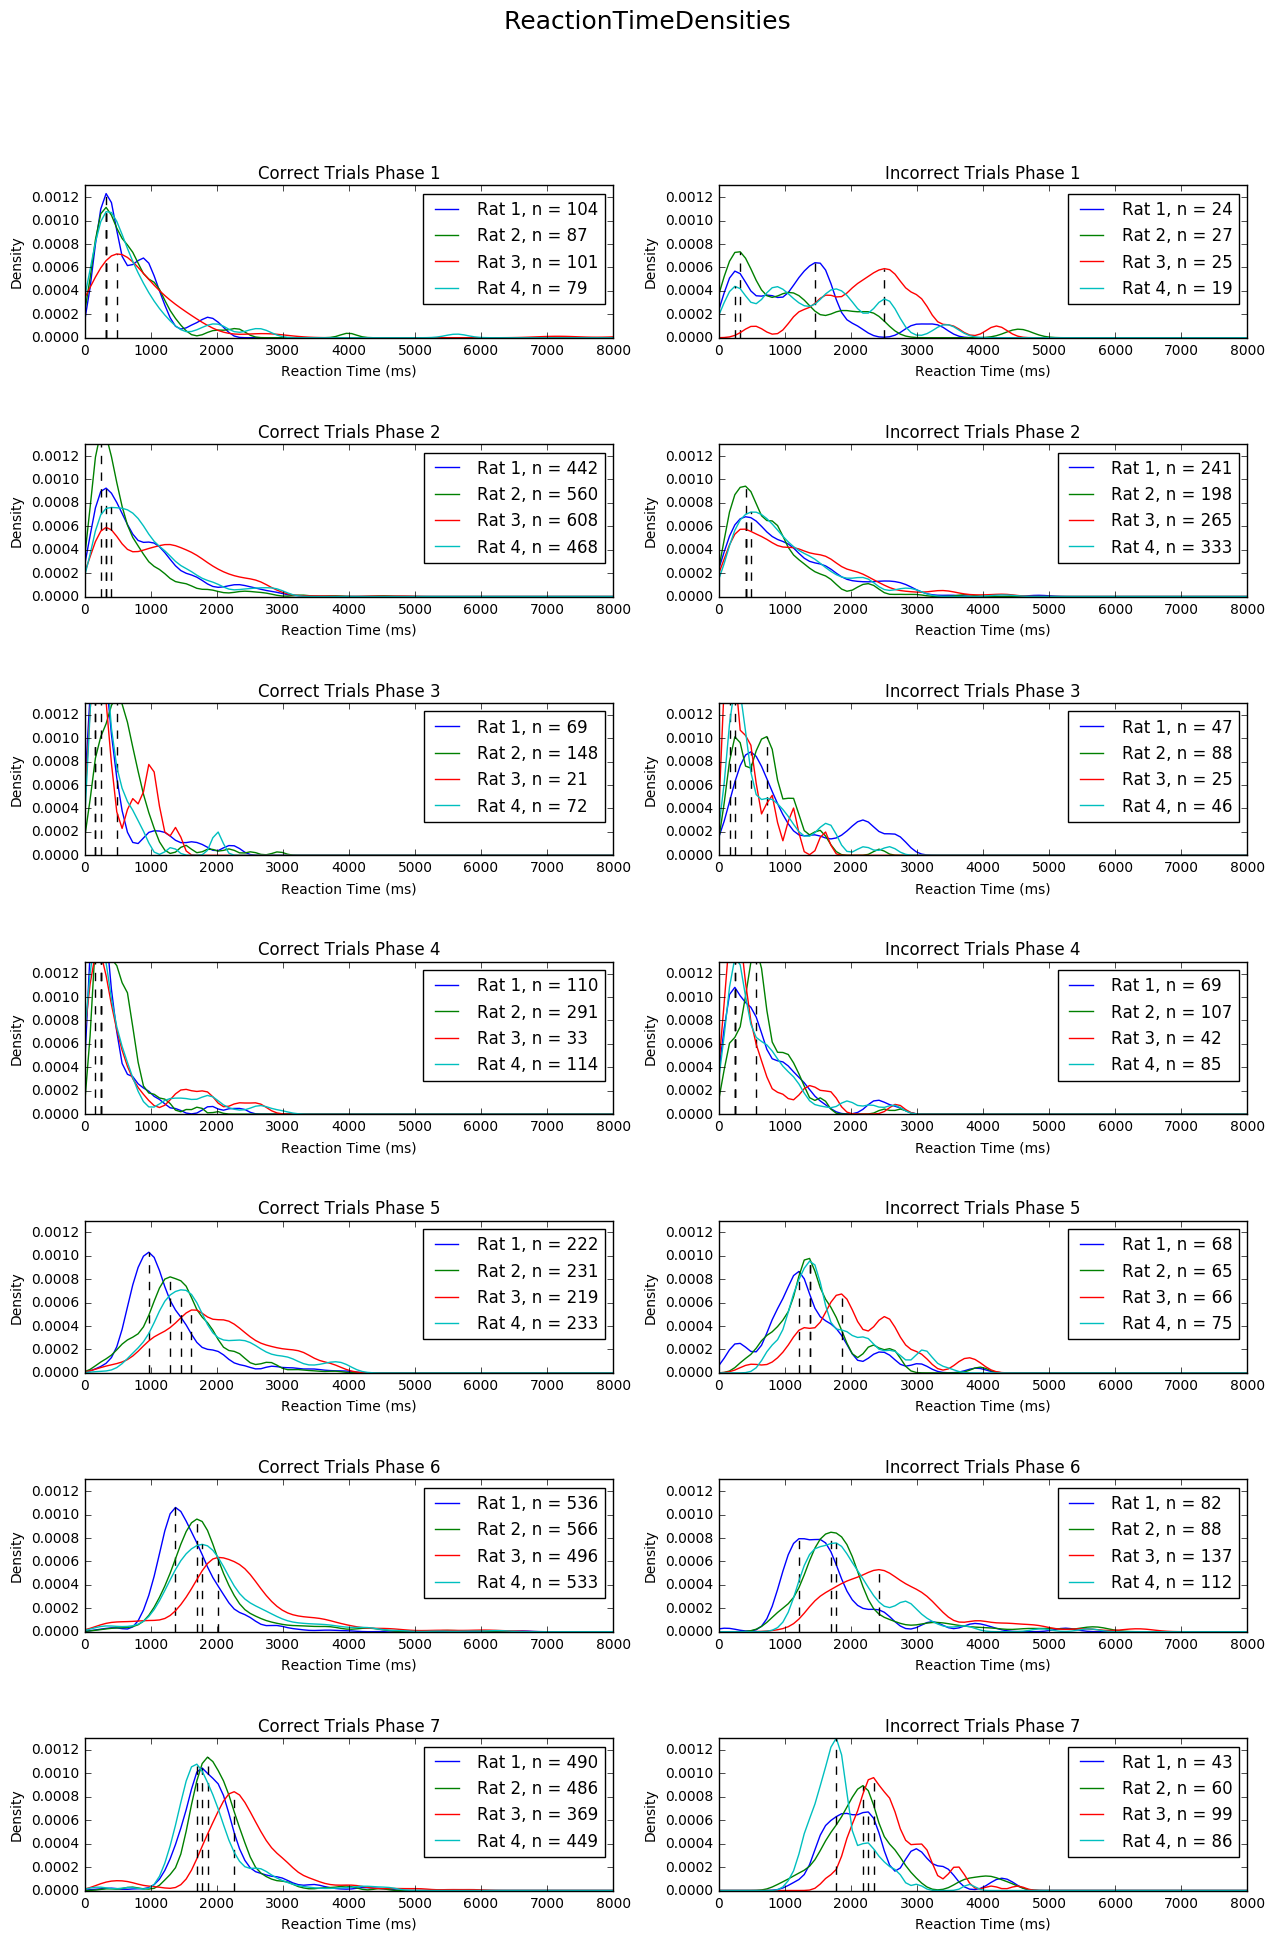

In [48]:
computeDensityPerPhase(rt, correct, incorrect)

-------------------------------------------------------------------------------------------------------------------------

Just a side note, I've found out that you can also make the density plots in one line of code (though I've yet to find out how to adjust the covariance factor to influence smoothing) :D

Phase
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
7    Axes(0.125,0.125;0.775x0.775)
dtype: object

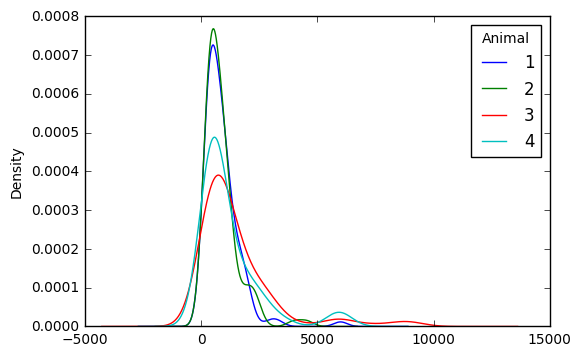

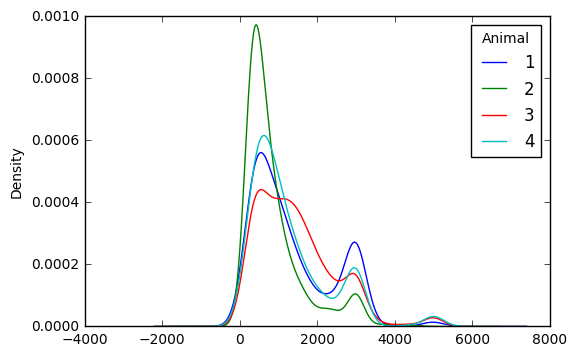

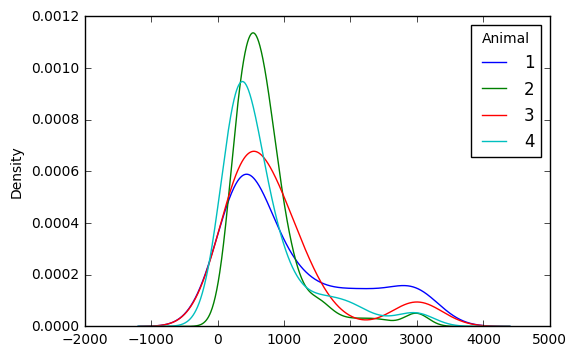

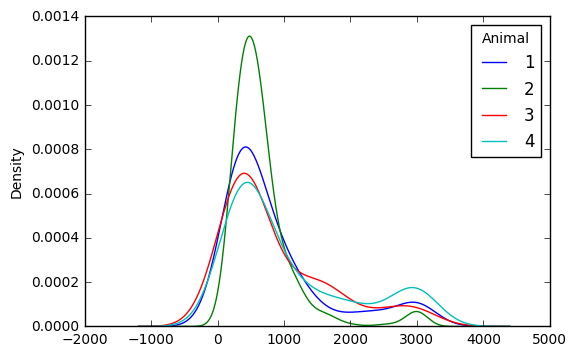

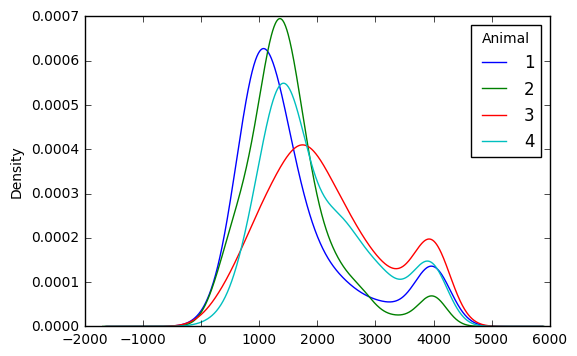

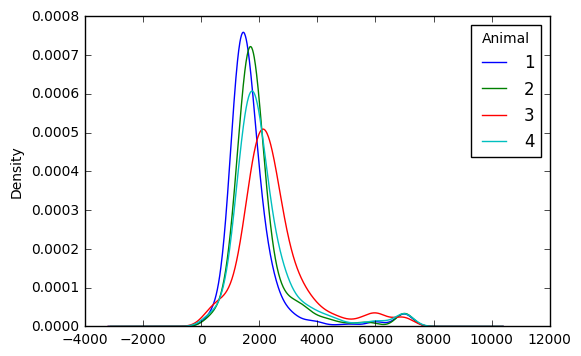

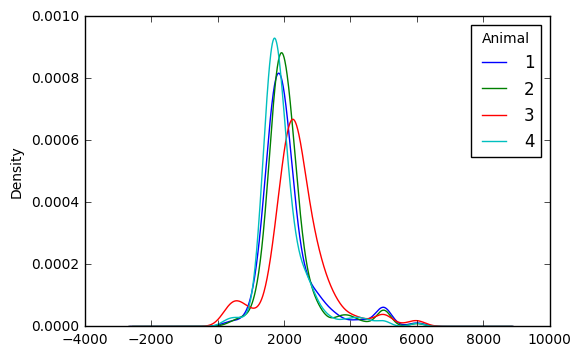

In [41]:
rtFiltered.groupby(level = "Phase").plot(kind ="density")

Phase
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
7    Axes(0.125,0.125;0.775x0.775)
dtype: object

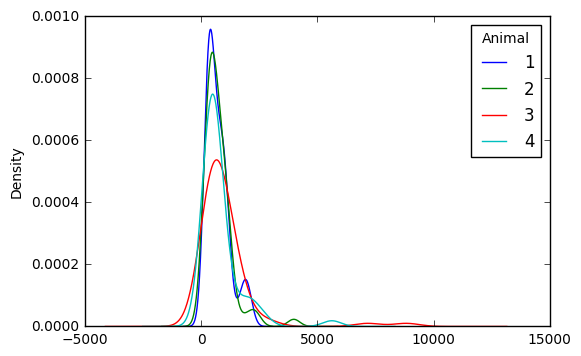

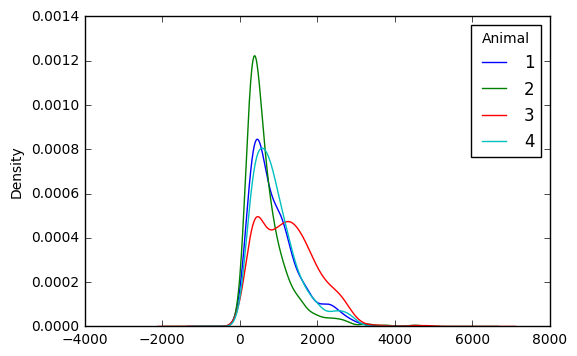

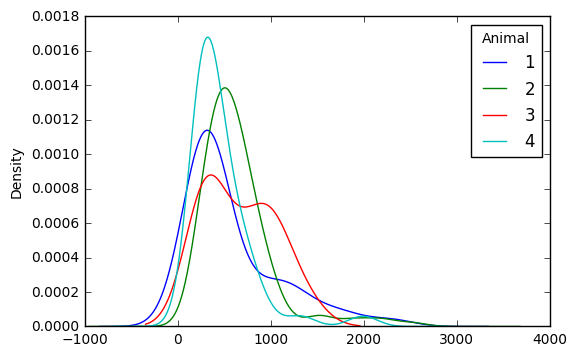

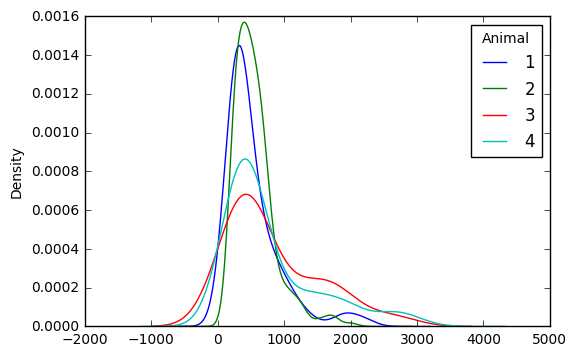

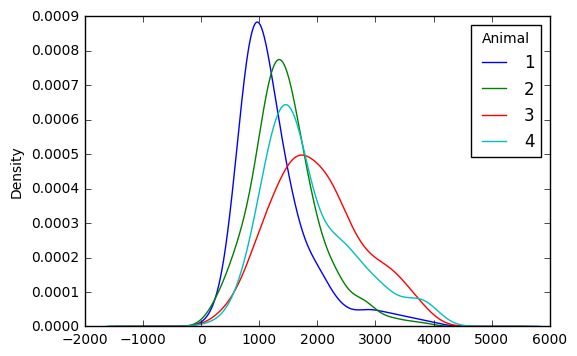

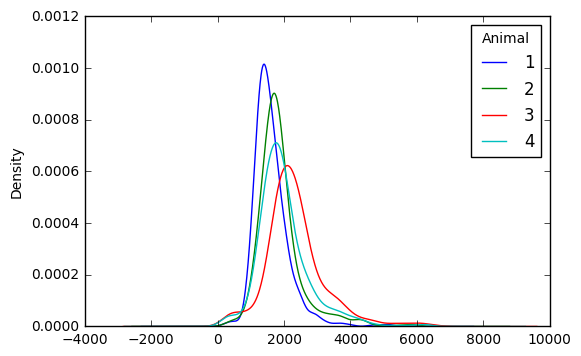

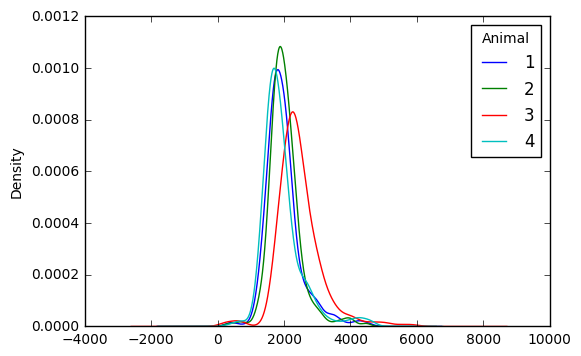

In [42]:
# to plot correct trials only:
rtFiltered[correct].groupby(level = "Phase").plot(kind ="density")

Phase
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
7    Axes(0.125,0.125;0.775x0.775)
dtype: object

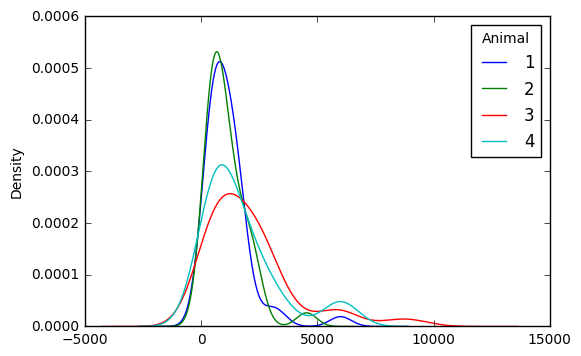

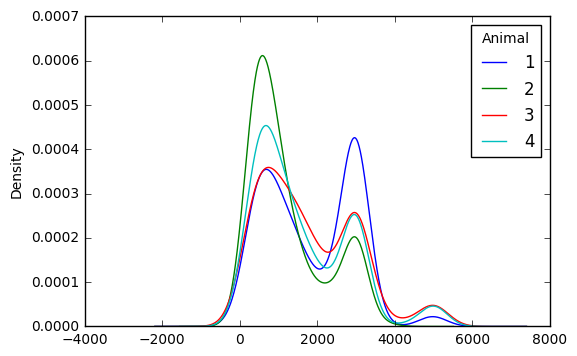

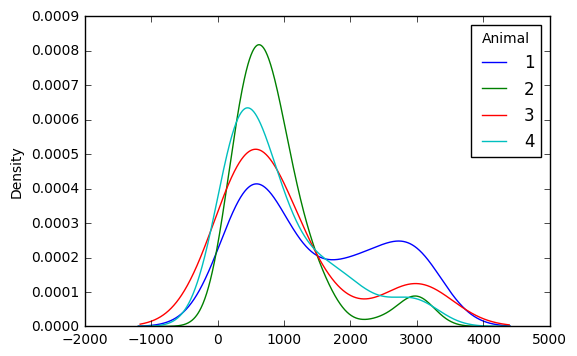

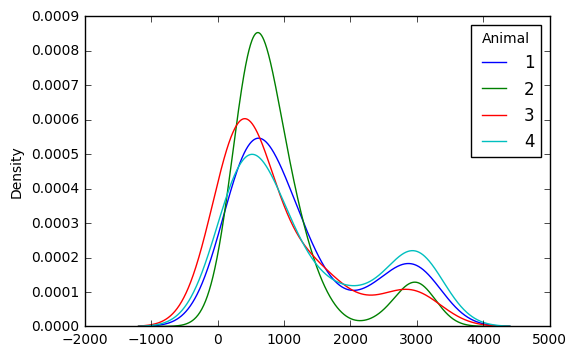

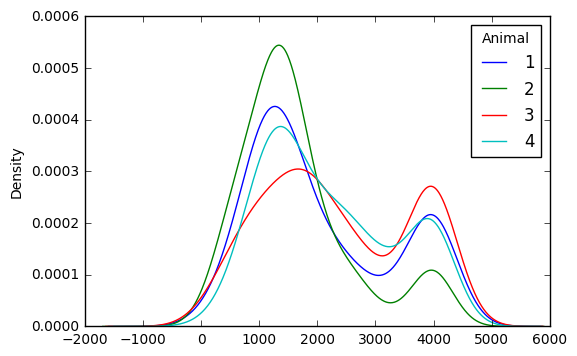

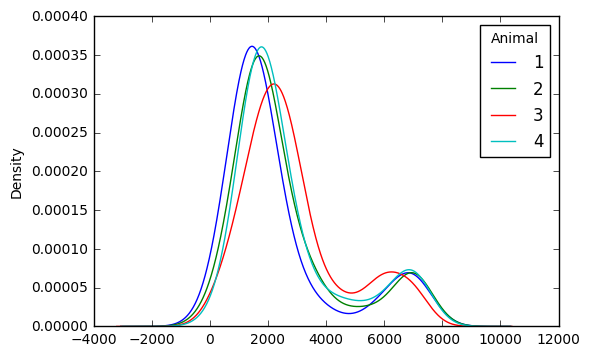

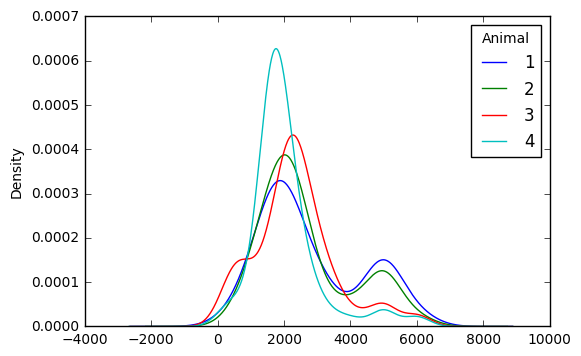

In [43]:
# to plot incorrect trials only:
rtFiltered[incorrect].groupby(level = "Phase").plot(kind ="density")

In [45]:
# get the stats
rtFiltered[correct].groupby(level = "Phase").describe()

1            2            3            4
Phase                                                          
1     count    73.000000    66.000000    72.000000    55.000000
      mean    728.164384   749.121212  1019.430556   815.854545
      std     486.009260   606.994475  1309.353811   878.695612
      min     206.000000   203.000000   204.000000   204.000000
      25%     355.000000   366.250000   419.750000   388.500000
      50%     591.000000   588.000000   705.500000   544.000000
      75%     970.000000   991.750000  1126.000000   791.000000
      max    2114.000000  3991.000000  8835.000000  5628.000000
2     count   375.000000   443.000000   553.000000   396.000000
      mean    903.098667   695.106095  1244.835443   927.813131
      std     621.070598   570.363126   745.230547   598.899768
      min     202.000000   201.000000   201.000000   201.000000
      25%     418.500000   334.000000   586.000000   476.000000
      50%     712.000000   506.000000  1197.000000   781.000000
      75%    1198.500000   837.500000  1716.000000  1200.750000
      max    3299.000000  4521.000000  4815.000000  2987.000000
3     count    44.000000   130.000000    15.000000    43.000000
      mean    584.090909   643.653846   662.666667   461.209302
      std     504.206391   397.373230   378.923224   331.610038
      min     202.000000   204.000000   229.000000   206.000000
      25%     245.250000   423.000000   300.000000   256.500000
      50%     344.500000   559.500000   666.000000   355.000000
      75%     746.250000   761.750000   989.500000   527.500000
      max    2293.000000  2520.000000  1381.000000  1990.000000
4     count    72.000000   238.000000    21.000000    67.000000
      mean    523.763889   554.735294   829.523810   785.746269
      std     413.520900   305.726128   684.749561   698.645797
      min     205.000000   201.000000   221.000000   205.000000
      25%     246.750000   340.250000   300.000000   314.000000
      50%     365.500000   484.000000   549.000000   499.000000
      75%     666.250000   672.500000  1352.000000   994.500000
      max    2201.000000  2004.000000  2620.000000  2954.000000
5     count   217.000000   220.000000   204.000000   225.000000
      mean   1257.774194  1458.518182  1989.392157  1839.382222
      std     627.474287   594.913512   772.200900   775.169593
      min     255.000000   208.000000   314.000000   234.000000
      25%     862.000000  1097.000000  1405.000000  1292.000000
      50%    1091.000000  1389.500000  1921.000000  1620.000000
      75%    1478.000000  1775.000000  2477.000000  2282.000000
      max    3956.000000  3785.000000  3895.000000  3979.000000
6     count   527.000000   560.000000   473.000000   521.000000
      mean   1621.430740  1877.210714  2334.023256  1990.117083
      std     541.527700   694.372523   902.023935   795.883338
      min     205.000000   263.000000   275.000000   221.000000
      25%    1299.000000  1504.750000  1851.000000  1532.000000
      50%    1520.000000  1751.000000  2206.000000  1855.000000
      75%    1829.500000  2047.750000  2642.000000  2255.000000
      max    5205.000000  5947.000000  6498.000000  6252.000000
7     count   484.000000   483.000000   348.000000   445.000000
      mean   1983.309917  2022.360248  2449.922414  1934.620225
      std     549.151168   496.363078   670.591306   608.734196
      min     315.000000   299.000000   226.000000   356.000000
      25%    1677.750000  1745.500000  2082.000000  1577.000000
      50%    1903.500000  1951.000000  2339.000000  1792.000000
      75%    2149.500000  2211.000000  2689.000000  2084.000000
      max    4596.000000  4486.000000  5880.000000  4637.000000

In [46]:
rtFiltered[incorrect].groupby(level = "Phase").describe()

1            2            3            4
Phase                                                          
1     count    45.000000    35.000000    59.000000    43.000000
      mean   1141.311111  1109.342857  2097.322034  1720.139535
      std     999.465558   877.746076  1924.955364  1643.905477
      min     210.000000   202.000000   218.000000   225.000000
      25%     496.000000   501.000000   738.000000   613.000000
      50%     883.000000   824.000000  1590.000000  1079.000000
      75%    1463.000000  1399.000000  2627.500000  2230.500000
      max    6001.000000  4543.000000  9146.000000  6001.000000
2     count   349.000000   215.000000   336.000000   449.000000
      mean   1842.507163  1213.148837  1763.955357  1597.853007
      std    1153.497581   944.447678  1235.228717  1202.329686
      min     211.000000   214.000000   205.000000   204.000000
      25%     753.000000   480.000000   712.500000   627.000000
      50%    1670.000000   845.000000  1471.500000  1200.000000
      75%    3001.000000  1645.500000  3001.000000  2804.000000
      max    5001.000000  3746.000000  5002.000000  5001.000000
3     count    59.000000    84.000000    18.000000    50.000000
      mean   1461.237288   881.119048  1042.944444   925.820000
      std    1029.586180   666.307310   965.502946   800.062133
      min     205.000000   204.000000   223.000000   208.000000
      25%     522.500000   478.250000   409.000000   319.500000
      50%    1014.000000   728.500000   629.500000   646.500000
      75%    2363.500000  1077.500000  1120.750000  1261.250000
      max    3002.000000  3001.000000  3001.000000  3001.000000
4     count    67.000000   105.000000    37.000000    97.000000
      mean   1202.791045   941.085714   912.162162  1268.896907
      std     954.439889   749.650779   878.258362  1051.737545
      min     214.000000   208.000000   207.000000   206.000000
      25%     480.000000   513.000000   299.000000   342.000000
      50%     863.000000   654.000000   495.000000   801.000000
      75%    1542.500000  1041.000000  1333.000000  2258.000000
      max    3002.000000  3001.000000  3001.000000  3002.000000
5     count   170.000000   160.000000   189.000000   150.000000
      mean   2069.652941  1639.031250  2338.751323  2204.880000
      std    1200.855278   969.997759  1228.851032  1105.449090
      min     272.000000   207.000000   243.000000   333.000000
      25%    1172.500000  1041.250000  1292.000000  1318.000000
      50%    1571.500000  1417.000000  2014.000000  1934.000000
      75%    3126.500000  1887.500000  4001.000000  3107.750000
      max    4002.000000  4001.000000  4002.000000  4001.000000
6     count   160.000000   158.000000   210.000000   173.000000
      mean   2358.100000  2582.493671  2859.471429  2720.369942
      std    1945.114435  1884.978250  1741.350859  1859.229752
      min     290.000000   292.000000   201.000000   340.000000
      25%    1225.500000  1474.000000  1712.500000  1543.000000
      50%    1617.000000  1904.500000  2397.500000  1973.000000
      75%    2438.500000  3015.750000  3241.750000  2893.000000
      max    7002.000000  7001.000000  7001.000000  7002.000000
7     count   108.000000   113.000000   232.000000   146.000000
      mean   2786.861111  2642.964602  2347.448276  2047.315068
      std    1516.240472  1374.691199  1226.277363  1025.353522
      min     247.000000   557.000000   240.000000   221.000000
      25%    1697.500000  1735.000000  1695.750000  1571.750000
      50%    2184.000000  2219.000000  2253.500000  1795.000000
      75%    4242.750000  3086.000000  2832.750000  2256.250000
      max    6001.000000  6001.000000  6001.000000  6001.000000

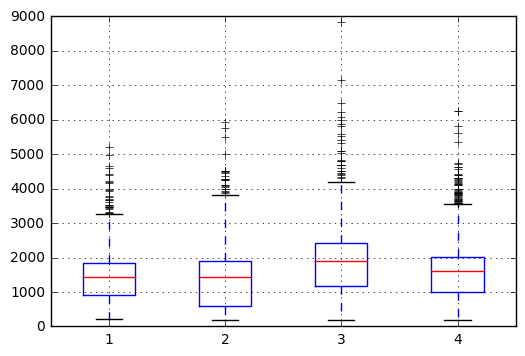

In [48]:
rtFiltered[correct].boxplot(return_type='axes')

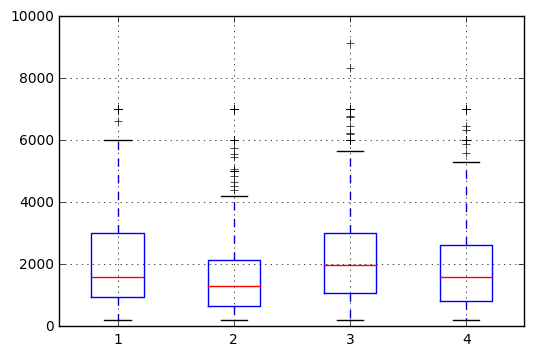

In [49]:
rtFiltered[incorrect].boxplot(return_type='axes')

OrderedDict([(1, <matplotlib.axes._subplots.AxesSubplot at 0x7f6126a43bd0>),
             (2, <matplotlib.axes._subplots.AxesSubplot at 0x7f61258e1ed0>),
             (3, <matplotlib.axes._subplots.AxesSubplot at 0x7f612586d3d0>),
             (4, <matplotlib.axes._subplots.AxesSubplot at 0x7f61257d12d0>),
             (5, <matplotlib.axes._subplots.AxesSubplot at 0x7f6125754110>),
             (6, <matplotlib.axes._subplots.AxesSubplot at 0x7f6125720c50>),
             (7, <matplotlib.axes._subplots.AxesSubplot at 0x7f61256afc10>)])

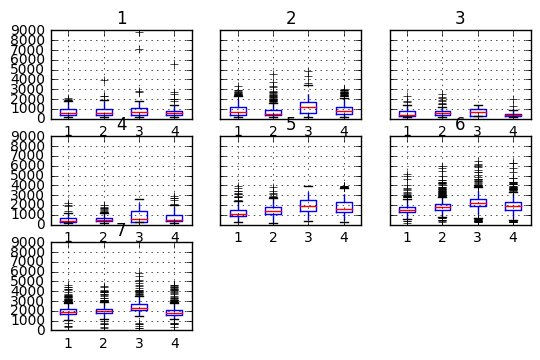

In [50]:
rtFiltered[correct].groupby(level = "Phase").boxplot(return_type = 'axes')

OrderedDict([(1, <matplotlib.axes._subplots.AxesSubplot at 0x7f610bb6ca10>),
             (2, <matplotlib.axes._subplots.AxesSubplot at 0x7f610baeeb10>),
             (3, <matplotlib.axes._subplots.AxesSubplot at 0x7f610ba0d510>),
             (4, <matplotlib.axes._subplots.AxesSubplot at 0x7f610b9ea790>),
             (5, <matplotlib.axes._subplots.AxesSubplot at 0x7f610b96e810>),
             (6, <matplotlib.axes._subplots.AxesSubplot at 0x7f610b98ea10>),
             (7, <matplotlib.axes._subplots.AxesSubplot at 0x7f610b8613d0>)])

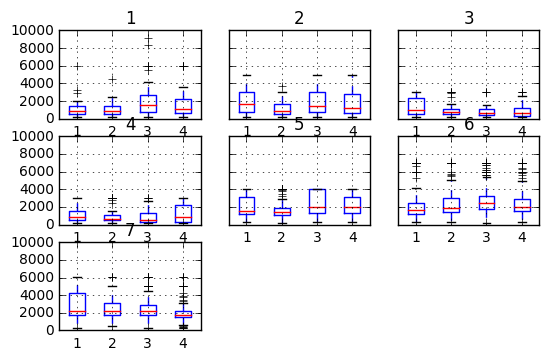

In [51]:
rtFiltered[incorrect].groupby(level = "Phase").boxplot(return_type = 'axes')

In [52]:
rtFiltered[correct].groupby(level = "Phase").quantile([.25,.75]).unstack()

Animal        1                 2                 3               4         
           0.25     0.75     0.25     0.75     0.25    0.75    0.25     0.75
Phase                                                                       
1        355.00   970.00   366.25   991.75   419.75  1126.0   388.5   791.00
2        418.50  1198.50   334.00   837.50   586.00  1716.0   476.0  1200.75
3        245.25   746.25   423.00   761.75   300.00   989.5   256.5   527.50
4        246.75   666.25   340.25   672.50   300.00  1352.0   314.0   994.50
5        862.00  1478.00  1097.00  1775.00  1405.00  2477.0  1292.0  2282.00
6       1299.00  1829.50  1504.75  2047.75  1851.00  2642.0  1532.0  2255.00
7       1677.75  2149.50  1745.50  2211.00  2082.00  2689.0  1577.0  2084.00

In [53]:
rtFiltered[incorrect].groupby(level = "Phase").quantile([.25,.75]).unstack()

Animal       1                 2                 3                 4         
          0.25     0.75     0.25     0.75     0.25     0.75     0.25     0.75
Phase                                                                        
1        496.0  1463.00   501.00  1399.00   738.00  2627.50   613.00  2230.50
2        753.0  3001.00   480.00  1645.50   712.50  3001.00   627.00  2804.00
3        522.5  2363.50   478.25  1077.50   409.00  1120.75   319.50  1261.25
4        480.0  1542.50   513.00  1041.00   299.00  1333.00   342.00  2258.00
5       1172.5  3126.50  1041.25  1887.50  1292.00  4001.00  1318.00  3107.75
6       1225.5  2438.50  1474.00  3015.75  1712.50  3241.75  1543.00  2893.00
7       1697.5  4242.75  1735.00  3086.00  1695.75  2832.75  1571.75  2256.25

In [54]:
rtFiltered[correct].groupby(level = "Phase").quantile([.25,.75]).mean(axis = 1).unstack()

0.25       0.75
Phase                      
1       382.3750   969.6875
2       453.6250  1238.1875
3       306.1875   756.2500
4       300.2500   921.3125
5      1164.0000  2003.0000
6      1546.6875  2193.5625
7      1770.5625  2283.3750

In [55]:
rtFiltered[incorrect].groupby(level = "Phase").quantile([.25,.75]).mean(axis = 1).unstack()

0.25       0.75
Phase                      
1       587.0000  1930.0000
2       643.1250  2612.8750
3       432.3125  1455.7500
4       408.5000  1543.6250
5      1205.9375  3030.6875
6      1488.7500  2897.2500
7      1675.0000  3104.4375

In [56]:
quartilesCorrect = rtFiltered[correct].groupby(level = "Phase").quantile([.25,.75]).mean(axis = 1).unstack()
quartilesIncorrect = rtFiltered[incorrect].groupby(level = "Phase").quantile([.25,.75]).mean(axis = 1).unstack()

In [103]:
errors = pd.DataFrame({'correct':rtFiltered[correct].groupby(level = "Phase").quantile(.75).std(axis=1) - rtFiltered[correct].groupby(level = "Phase").quantile(.25).std(axis=1), 'incorrect':rtFiltered[incorrect].groupby(level = "Phase").quantile(.75).std(axis = 1)- rtFiltered[incorrect].groupby(level = "Phase").quantile(.25).std(axis = 1)})

In [104]:
errors

correct   incorrect
Phase                        
1      109.117330  484.883737
2      255.621789  530.800036
3      107.359712  521.696218
4      286.104642  414.762197
5      220.145182  741.859444
6      117.787705  136.133391
7       56.481593  763.357714

In [91]:
iqr = pd.DataFrame({'correct':quartilesCorrect[0.75] - quartilesCorrect[0.25], 'incorrect': quartilesIncorrect[0.75] - quartilesIncorrect[0.25]})

In [102]:
iqr

correct  incorrect
Phase                     
1      587.3125  1343.0000
2      784.5625  1969.7500
3      450.0625  1023.4375
4      621.0625  1135.1250
5      839.0000  1824.7500
6      646.8750  1408.5000
7      512.8125  1429.4375

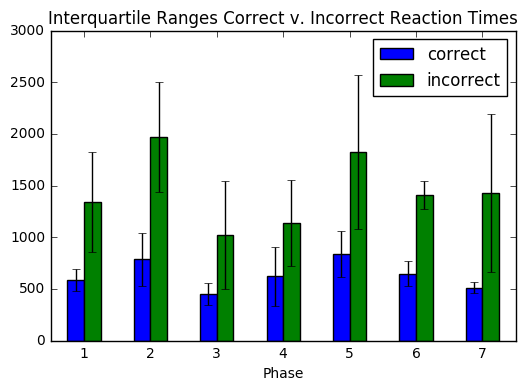

In [105]:
iqr.plot(kind="bar", title = "Interquartile Ranges Correct v. Incorrect Reaction Times",rot =0, yerr = errors)

#### Compute the p-value with the Mann-Whitney-Wilcoxon (MWW) RankSum test
Use the MWW RankSum test to determine if the distributions of the reaction times of the correct and incorrect trials are significantly different or not. The RankSum test does not assume that the data is normally distributed. Here I'll examine the significance of the difference between the interquartile ranges of corrrect and incorrect reaction time distributions.

In [109]:
z_stat, p_val = stats.ranksums(iqr['correct'], iqr['incorrect']) 

In [113]:
p_val

0.001745118699528905

This means there's a 0.17% chance that the same apparent differences between the correct and incorrect datasets would have resulted if they were actually identical. Thus we can say they are significantly different with a 99.83% confidence level. 

In [129]:
medians = pd.DataFrame({"correct": rtFiltered[correct].groupby(level = "Phase").median().mean(axis = 1), "incorrect": rtFiltered[incorrect].groupby(level = "Phase").median().mean(axis = 1) })

In [130]:
medians

correct  incorrect
Phase                     
1       607.125   1094.000
2       799.000   1296.625
3       481.250    754.625
4       474.375    703.250
5      1505.375   1734.125
6      1833.000   1973.000
7      1996.375   2112.875

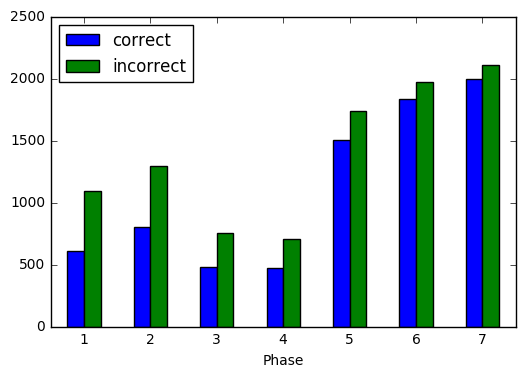

In [133]:
medians.plot(kind = "bar", rot = 0)

In [134]:
z_stat, p_val = stats.ranksums(medians['correct'],medians['incorrect']) 

In [135]:
p_val

0.33790401910300505

As is already visible in the bar graph the medians of the correct and incorrect trials don't significantly differ. This is likely to be the case because the behavior of the animals, and their reaction times are comparable in the first peak of the distributions (where they seem to be sure of their choice). The first peaks are still fairly normally distributed (slope evenly away from both sides of the highest point - need to find out if in pandas density plots a gaussian kernel was used...), yet the first peak in the incorrect distributions is usually wider, meaning reaction times are slightly more distributed, which is clearly visible in the comparisions of the interquartile ranges. 

It occurred to me that calculating a p-value over the phases isn't correct, the phases shouldn't be compared to each other, the average was over the animals per phase, than that should be where the p-value comes from, there should be one per phase? Or perhaps even better is just to look at the raw reaction times per phase, per animal. (compare each reaction time labelled as correct with those labelled as incorrect?)